## Etapa que compara o teste de hipóteses considerando os dois grupos distintos
-  Uso de teste t de Student para duas amostras independentes 

In [2]:
import pandas as pd

df = pd.read_csv("data/titanic.csv")

def dividir_grupos(df, target_col):
    if df[target_col].dtype == 'int64':
        grupo_1 = df[df[target_col] == 1]
        grupo_0 = df[df[target_col] == 0]
        
    else:
        grupo_1 = df[df[target_col] == 'Yes']
        grupo_0 = df[df[target_col] == 'No']
    
    return grupo_1, grupo_0

grupo_1, grupo_0 = dividir_grupos(df, 'Survived')
grupo_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Função e uso
- Importante ressaltar que não podem haver dados nulos ou ausentes
- O parâmetro é uma variável numérica

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def teste_hipotese(grupo_1, grupo_0, var_numerica):
    media_grupo_1 = grupo_1[var_numerica].mean()
    media_grupo_0 = grupo_0[var_numerica].mean()
    
    desvio_grupo_1 = grupo_1[var_numerica].std()
    desvio_grupo_0 = grupo_0[var_numerica].std()
    
    stat, p_val = stats.ttest_ind(grupo_1[var_numerica], grupo_0[var_numerica], equal_var=False)  
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[grupo_1[var_numerica], grupo_0[var_numerica]], palette='Set2')
    plt.xticks([0, 1], ['Grupo 1', 'Grupo 0'])
    plt.title(f'Comparação de {var_numerica} entre os grupos')
    plt.ylabel(var_numerica)
    plt.grid(True)
    plt.show()
    
    print(f"Teste de Hipótese para '{var_numerica}':")
    print(f"Estatística do teste: {stat:.2f}")
    print(f"Valor p: {p_val:.5f}")
    
    # Interpretação do valor p
    alpha = 0.05  # nível de significância
    if p_val < alpha:
        print("Rejeitamos a hipótese nula: há uma diferença significativa entre os grupos.")
    else:
        print("Não rejeitamos a hipótese nula: não há diferença significativa entre os grupos.")


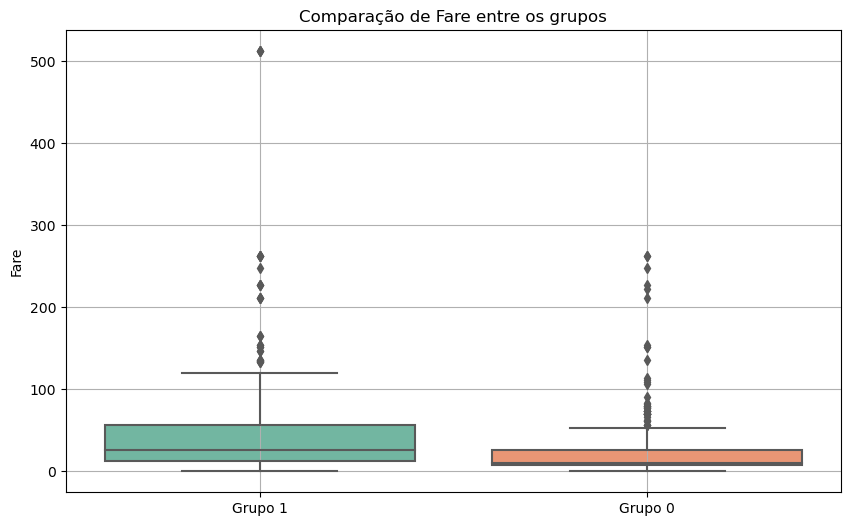

Teste de Hipótese para 'Fare':
Estatística do teste: 6.84
Valor p: 0.00000
Rejeitamos a hipótese nula: há uma diferença significativa entre os grupos.


In [46]:
#uso
teste_hipotese(grupo_1, grupo_0, 'Fare')

### Interpretação:
#### Tarifa (Fare):
- Estatística do teste: 6.84:
Esse valor indica a diferença padronizada entre as médias das tarifas nos dois grupos. Um valor alto sugere que as médias das tarifas dos grupos são significativamente diferentes.

- Valor p: 0.00000:
Um valor p de 0.00000 (ou muito próximo de zero) indica que a diferença observada entre as médias das tarifas é altamente significativa. Isso significa que a probabilidade de obter uma diferença tão extrema entre as médias das tarifas, se a hipótese nula (que afirma que não há diferença entre os grupos) for verdadeira, é extremamente baixa.

- Interpretação:
Com base neste resultado, rejeitamos a hipótese nula. Há evidências estatísticas suficientes para afirmar que existe uma diferença significativa entre as tarifas pagas pelos dois grupos (survived vs. not survived). Isso sugere que o comportamento ou as características dos passageiros em relação à tarifa estão relacionados à sua sobrevivência.
